@auth: Zhu.Jinhua 2018.2.10
数据集20180209链家南京数据

In [11]:
import numpy as np
import pandas as pd



## 加载并浏览数据
可以通过pandas的read_csv加载csv文件，使用info()及describe查看数据的基本信息

In [12]:
houseraw=pd.read_csv('lianjia_nj_ershou.csv')
houseraw.info()
houseraw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 8 columns):
urban        17973 non-null object
recommand    17973 non-null object
zone         17973 non-null object
desc         17973 non-null object
region       17973 non-null object
price        17973 non-null float64
unitprice    17973 non-null int64
age          17973 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ MB


,price,unitprice
count,17973.000000,17973.000000
mean,297.707912,31223.454905
std,178.942760,9796.943278
min,7.000000,5209.000000
25%,188.000000,24892.000000
50%,249.000000,29078.000000
75%,350.000000,34988.000000
max,3380.000000,118044.000000


可以看出一共抓了17973套房源，总价最低才7万，最高的3380万，75%以下的是350万，单价最小的5209，最高的是118044，平均31223. 当然后面我们会对数据进一步去重等操作，这些值会略有变化。
大概看下记录的样子~~

In [13]:
houseraw.head()

,urban,recommand,zone,desc,region,price,unitprice,age
0,gulou,金陵御沁园 新出电梯三房 小高层中间楼层 不临街,金陵御沁园,| 3室2厅 | 131.1平米 | 南 | 精装 | 有电梯,龙江,525.0,40046,中楼层(共11层)2004年建板塔结合 -
1,gulou,满五年 双卧朝南厨卫朝北 交通便利 配套齐全 随时看房,幕府佳园,| 2室1厅 | 92.74平米 | 南 | 精装 | 有电梯,金陵小区,240.0,25879,高楼层(共11层)2006年建板楼 -
2,gulou,汉中门大街 凤凰庄 芳草园凤凰校区 中间楼层 地铁口,凤凰庄,| 2室1厅 | 50.1平米 | 南 北 | 简装 | 无电梯,汉中门大街,205.0,40919,低楼层(共6层)1993年建板楼 -
3,gulou,五塘广场 精装刚需两房 29中 家具家电全留,黄方村1号,| 2室1厅 | 45.71平米 | 南 北 | 精装,五塘广场,113.0,24722,高楼层(共6层)1999年建板塔结合 -
4,gulou,苏宁千秋情缘 大四房 满五年唯一 全明格局 拎包入住,苏宁千秋情缘花园,| 4室2厅 | 165.93平米 | 南 北 | 精装 | 有电梯,龙江,750.0,45200,低楼层(共25层)2005年建板塔结合 -


desc描述字段里面有面积，但处理着麻烦，记录中的单价也是系统自动根据总价与面积得到的，我们反其道而行之，从总价与单价得到近似面积。

In [14]:
houseraw['area']=(houseraw['price']*10000/houseraw['unitprice']).round(decimals=2)

In [15]:
hdf=houseraw
hdf.describe()

,price,unitprice,area
count,17973.000000,17973.000000,17973.000000
mean,297.707912,31223.454905,95.074562
std,178.942760,9796.943278,42.116136
min,7.000000,5209.000000,9.090000
25%,188.000000,24892.000000,65.150000
50%,249.000000,29078.000000,87.990000
75%,350.000000,34988.000000,116.500000
max,3380.000000,118044.000000,526.180000


面积平均95平，最小的9平。居然有总价只有7万的房源，是不是最小面积为9.09平的这个呢？我们看下20万以下的都是什么

In [16]:
hdf[hdf['price']<20]

,urban,recommand,zone,desc,region,price,unitprice,age,area
1991,jianye,万达商圈 标准车位 万达西地 地下车位,万达西地一期,| 车位 | 9.09平米 | 南 | 无电梯,万达广场,15.0,16502,2009年建板塔结合 -,9.09
2059,jianye,这个车位处于小区1幢的下边，毛坯装修,万达西地二期,| 车位 | 13.14平米 | 南 | 无电梯,万达广场,18.0,13699,2009年建板塔结合 -,13.14
7595,yuhuatai,名城世家 2期车位 电梯旁 地下产权车库 价格低,名城世家花园,| 车位 | 13.18平米 | 南 | 无电梯,小行,15.0,11381,2010年建板楼 -,13.18
7606,yuhuatai,蓝岸尚城 产权车位 产权清晰 单卖,蓝岸尚城,| 车位 | 13.44平米 | 南 北 | 无电梯,铁心桥,7.0,5209,2007年建板塔结合 -,13.44
7607,yuhuatai,房龄新 户型好 物业不错 居住舒适度高,亚东观云国际,| 车位 | 13.36平米 | 南 | 无电梯,能仁里,16.5,12351,2012年建板楼 -,13.36
7608,yuhuatai,蓝岸尚城 产权车位 产权清晰 单卖,蓝岸尚城,| 车位 | 13.44平米 | 南 北 | 无电梯,铁心桥,7.2,5358,2007年建板塔结合 -,13.44
9128,qixia,栖霞建设 东方天郡西区 D库产权车位,东方天郡西区,| 车位 | 13.19平米 | 南,仙林,18.0,13647,2009年建板塔结合 -,13.19
9172,qixia,东方天郡西区产权车位，随时可看。,东方天郡西区,| 车位 | 13.17平米 | 东 | 无电梯,仙林,17.0,12909,2009年建板塔结合 -,13.17
9180,qixia,诚品城车库 业主诚心卖 位置也不错,诚品城,| 车位 | 13.74平米 | 南 北 | 无电梯,仙林,7.8,5677,2009年建板塔结合 -,13.74


原来是些车位。 那最贵的车位是那里呢，如下看上去是水西门的，但单价不是最贵的

In [17]:
hdf[(hdf['price']>40) & (hdf['desc'].str.contains(u'车位'))]

,urban,recommand,zone,desc,region,price,unitprice,age,area
1999,jianye,电梯直达 地下车位靠出口 进出方便 12平方,万科金色家园,| 车位 | 34.18平米 | 南,水西门,50.0,14629,2002年建板楼 -,34.18
2095,jianye,奥体 仁恒二期车位 位置好 随时可看 诚售,仁恒江湾城二期,| 车位 | 13.54平米 | 南 | 无电梯,奥体,48.0,35451,2006年建板楼 -,13.54
17417,gulou,满五年 地下产权车位 两证齐全 随时可以过户,聚福园一期,| 车位 | 31.99平米 | 南 | 无电梯,龙江,41.0,12817,2001年建板塔结合 -,31.99


In [18]:
hdf[hdf['desc'].str.contains(u'车位')].sort_values(by='unitprice',ascending=False)

,urban,recommand,zone,desc,region,price,unitprice,age,area
2095,jianye,奥体 仁恒二期车位 位置好 随时可看 诚售,仁恒江湾城二期,| 车位 | 13.54平米 | 南 | 无电梯,奥体,48.0,35451,2006年建板楼 -,13.54
1990,jianye,业主苏宁睿城房子已经出售了，现在出售车位，可以看,苏宁睿城,| 车位 | 14.41平米 | 南 | 无电梯,万达广场,40.0,27759,2012年建板楼 -,14.41
2077,jianye,该业主苏宁睿城房子已经出售，车位没用，随时可以出售,苏宁睿城,| 车位 | 14.41平米 | 南 北 | 无电梯,万达广场,40.0,27759,2012年建板楼 -,14.41
1998,jianye,金基产权车位 满二 无抵押无贷款 业主诚售,金基汇锦国际,| 车位 | 13.29平米 | 东 | 无电梯,奥体,36.0,27089,2009年建板塔结合 -,13.29
1989,jianye,苏宁睿城 车位 三四期 业主诚售,苏宁睿城,| 车位 | 14.48平米 | 南 | 无电梯,万达广场,39.0,26934,2013年建板楼 -,14.48
2078,jianye,丹桂园 负一楼车位 自走式 有钥匙 随时可以看,丹桂园,| 车位 | 13.64平米 | 南 | 无电梯,兴隆大街,35.0,25660,2015年建板塔结合 -,13.64
2001,jianye,车库中间位置，距离楼栋都近，产权车位，急售,万达华府东苑,| 车位 | 13.91平米 | 东 | 无电梯,奥体,32.0,23006,2005年建板楼 -,13.91
5007,qinhuai,满五年 无抵押无贷款 雅居乐产权车位,雅居乐花园,| 车位 | 13.7平米 | 北 | 无电梯,秦虹,31.0,22628,2009年建板塔结合 -,13.70
2075,jianye,金基汇锦国际地下产权车位 业主诚心出售,金基汇锦国际,| 车位 | 13.29平米 | 南 | 无电梯,奥体,30.0,22574,2009年建板塔结合 -,13.29
2047,jianye,奥体 金基汇锦国际 地下产权车位 业主诚心急售,金基汇锦国际,| 车位 | 13.29平米 | 南 | 无电梯,奥体,30.0,22574,2009年建板塔结合 -,13.29


单价最贵的在奥体要3.5万，最便宜的在铁心桥，只要5209。我们过滤掉车位的房源，看下单价最贵的，结果全是学区房

In [19]:
hdf=hdf[~hdf['desc'].str.contains(u'车位')]
hdf.sort_values(by='unitprice',ascending=False).head(20)

,urban,recommand,zone,desc,region,price,unitprice,age,area
17021,gulou,拉小29中本部 低总价 学籍占用,金鹏大厦,| 1室0厅 | 23.72平米 | 西南 | 其他 | 有电梯,华侨路,280.0,118044,中楼层(共18层)1998年建板楼 -,23.72
17650,gulou,琅小29中本部 精装修 钱塘路 采光好 玉泉路,天目路,| 3室2厅 | 67平米 | 南 | 其他 | 无电梯,宁海路,750.0,111941,高楼层(共5层)1991年建板楼 -,67.00
17641,gulou,琅小29中本部 精装修 钱塘路 采光好 玉泉路,天目路,| 3室2厅 | 67平米 | 南 | 其他 | 无电梯,宁海路,750.0,111941,高楼层(共5层)1991年建板楼 -,67.00
16323,gulou,剑阁路31号 力小二十九中 小两房 4楼,剑阁路31号,| 2室1厅 | 41.4平米 | 南 北 | 精装 | 无电梯,宁海路,423.0,102174,中楼层(共5层)1990年建板楼 -,41.40
15797,gulou,楼层好 采光不挡 房龄新 拉小 29施教区 学籍不占,怡景花园,| 2室1厅 | 55.09平米 | 南 北 | 精装 | 无电梯,华侨路,562.0,102015,高楼层(共6层)1995年建板楼 -,55.09
163,gulou,拉萨路 采光很好 全明方正 五台山 拉小,拉萨路小区,| 2室1厅 | 50.11平米 | 南 | 简装 | 无电梯,华侨路,510.0,101777,低楼层(共7层)1992年建板塔结合 -,50.11
17279,gulou,琅琊路 二十九中 学籍不占 满五年 钱塘路,钱塘路,| 2室1厅 | 53.8平米 | 南 北 | 其他 | 有电梯,宁海路,545.0,101302,中楼层(共7层)1990年建板楼 -,53.80
17412,gulou,山阴路 力小 29中本部 满五年 中间楼层 业主诚心,山阴路,| 2室1厅 | 44.58平米 | 西 | 其他 | 无电梯,宁海路,450.0,100943,中楼层(共7层)1990年建板塔结合 -,44.58
254,gulou,29中 拉小 南北通透 采光好 2楼 全明户型,百步坡,| 2室1厅 | 51.71平米 | 南 北 | 简装 | 无电梯,华侨路,517.0,99981,低楼层(共7层)1993年建板楼 -,51.71
3110,qinhuai,月牙花园湖 临湖独栋别墅 带院子带车库 诚售随时可看,明湖山庄,| 7室4厅 | 338.9平米 | 南 北 | 精装 | 无电梯,月牙湖,3380.0,99735,低楼层(共1层)2000年建板塔结合 -,338.90


## 记录去重

检查下上述数据是否有重复行，使用DataFrame.duplicated()方法：

In [20]:
hdf[hdf.duplicated()].count()

urban        1460
recommand    1460
zone         1460
desc         1460
region       1460
price        1460
unitprice    1460
age          1460
area         1460
dtype: int64

可以使用掩码子集或drop_duplicates()方法删除重复行。如下可看到总共17946行，1460个重复记录，删除后剩下16486条记录。后面使用df做分析数据集。

In [21]:
xx=hdf[~hdf.duplicated()]
df=hdf.drop_duplicates()
print('total ',hdf['urban'].count(),'\ndropduplicates():',xx['urban'].count(),df['urban'].count(),)

total  17946 
dropduplicates(): 16486 16486


看下去掉车位及重复记录的数据集基本信息

In [22]:
df.describe()

,price,unitprice,area
count,16486.000000,16486.000000,16486.000000
mean,299.506472,31356.400643,95.184748
std,181.969963,9806.622489,42.559987
min,41.000000,11540.000000,18.770000
25%,187.000000,24971.000000,64.970000
50%,249.950000,29256.000000,87.780000
75%,355.000000,35141.750000,116.520000
max,3380.000000,118044.000000,526.180000


## 高价房分布

In [23]:

gt45k=df[df['unitprice']>50000]
gt45k.count()

urban        820
recommand    820
zone         820
desc         820
region       820
price        820
unitprice    820
age          820
area         820
dtype: int64

In [24]:
x=gt45k.groupby(['urban','zone']).count().reset_index()
x.sort_values('recommand',ascending=False)

,urban,zone,recommand,desc,region,price,unitprice,age,area
113,gulou,银城花园北片,18,18,18,18,18,18,18
53,gulou,新城市广场,17,17,17,17,17,17,17
191,jianye,金基汇锦国际,16,16,16,16,16,16,16
175,jianye,星雨华府,14,14,14,14,14,14,14
139,jianye,仁恒江湾城一期,12,12,12,12,12,12,12
47,gulou,怡景花园,12,12,12,12,12,12,12
278,yuhuatai,德盈国际,11,11,11,11,11,11,11
186,jianye,莱蒙水榭春天,11,11,11,11,11,11,11
84,gulou,育才公寓,10,10,10,10,10,10,10
85,gulou,芳草园,10,10,10,10,10,10,10


In [25]:
x=gt45k.groupby('urban').count().reset_index()
x.sort_values('recommand',ascending=False)
x1=x[x['recommand']>0]['urban']
y1=x[x['recommand']>0]['recommand']
x1

0        gulou
1    jiangning
2       jianye
3      qinhuai
4        qixia
5       xuanwu
6     yuhuatai
Name: urban, dtype: object

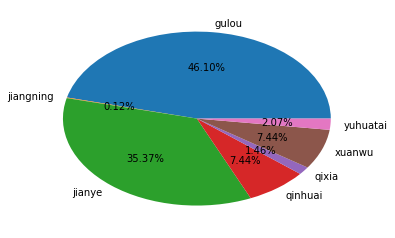

In [26]:
import matplotlib.pyplot as plt
plt.pie(y1,labels=x1,autopct='%1.2f%%')
plt.show()

In [27]:
from wordcloud import WordCloud
import codecs
#import jieba
#import jieba.analyse as analyse
from scipy.misc import imread
import os
from os import path
import matplotlib.pyplot as plt

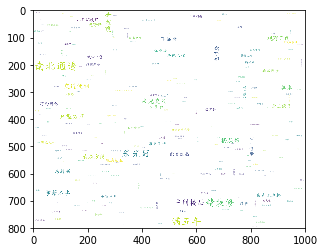

In [30]:
comment_text = gt45k['recommand']

#print (comment_text.values)
wordlist=[]
#print(type(comment_text.values))
for line in comment_text.values:
    wordlist.extend(line.split())

#print(wordlist)
cut_text = " ".join(wordlist)
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path="c:\\windows\fonts\simkai.ttf",
    width=1000,height=800,
    #设置背景色
    background_color='white',
    #词云形状
    #mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=40
)
word_cloud = cloud.generate(cut_text) # 产生词云
word_cloud.to_file("keywords_gt50k.jpg") #保存图片
#  显示词云图片
plt.imshow(word_cloud)
plt.figure(figsize=(10,8),dpi=100)
#plt.axis('off')
plt.show()

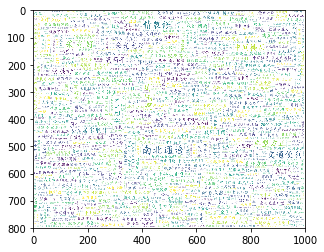

In [31]:


comment_text = df['recommand']
#print (comment_text.values)
wordlist=[]
#print(type(comment_text.values))
for line in comment_text.values:
    wordlist.extend(line.split())

#print(wordlist)
cut_text = " ".join(wordlist)
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path="c:\\windows\fonts\simkai.ttf",
    width=1000,height=800,
    #设置背景色
    background_color='white',
    #词云形状
    #mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=40
)
word_cloud = cloud.generate(cut_text) # 产生词云
word_cloud.to_file("keywords_all.jpg") #保存图片
#  显示词云图片
plt.imshow(word_cloud)
plt.figure(figsize=(10,8),dpi=100)
#plt.axis('off')
plt.show()
      
      
